<h1 style="text-align:center; font-size: 50px; font-family: 'Arial', sans-serif; font-weight: bold; color: #3498db;">
  Spending Pattern analysis
</h1>

# 1. Improting Necessary librarires

In [1]:
import numpy as np
import pandas as pd 
import plotly.express as px

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/retail-transactional-dataset/retail_data.csv


In [2]:
df = pd.read_csv('/kaggle/input/retail-transactional-dataset/retail_data.csv')

In [3]:
df.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


# 2. Data Preprocessing

## 2.1 Handling Missing values

**Before removing missing values**

In [4]:
print(df.isna().sum())
print(f'Total dataset shape: {df.shape}')

Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64
Total dataset shape: (302010, 30)


The dataset have plenty of missing value of about 300 average on each column that have missing value. We could impute these values but since we have a large dataset of around 30k rows removing 300 wouldn't take a toll on our outcome.

In [5]:
# Removing all null values from the dataset
df.dropna(inplace = True)

**Before removing missing values**

In [6]:
print(df.isna().sum())
print(f'Total dataset shape: {df.shape}')

Transaction_ID      0
Customer_ID         0
Name                0
Email               0
Phone               0
Address             0
City                0
State               0
Zipcode             0
Country             0
Age                 0
Gender              0
Income              0
Customer_Segment    0
Date                0
Year                0
Month               0
Time                0
Total_Purchases     0
Amount              0
Total_Amount        0
Product_Category    0
Product_Brand       0
Product_Type        0
Feedback            0
Shipping_Method     0
Payment_Method      0
Order_Status        0
Ratings             0
products            0
dtype: int64
Total dataset shape: (293911, 30)


## 2.2 Removing unnecessary features

In [7]:
df.drop(['Transaction_ID', 'Customer_ID' ,'Name','Email','Phone','City','Zipcode','Address','State','Year','Month'], axis = 1, inplace = True)

In [8]:
df.columns

Index(['Country', 'Age', 'Gender', 'Income', 'Customer_Segment', 'Date',
       'Time', 'Total_Purchases', 'Amount', 'Total_Amount', 'Product_Category',
       'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method',
       'Payment_Method', 'Order_Status', 'Ratings', 'products'],
      dtype='object')

In [9]:
df['Product_Brand'].unique()

array(['Nike', 'Samsung', 'Penguin Books', 'Home Depot', 'Nestle',
       'Apple', 'Zara', 'Random House', 'Coca-Cola', 'Adidas', 'Pepsi',
       'IKEA', 'HarperCollins', 'Bed Bath & Beyond', 'Sony', 'Whirepool',
       'Mitsubhisi', 'BlueStar'], dtype=object)

# 3. Exploratory Data Analysis (EDA)

<Axes: ylabel='Product_Brand'>

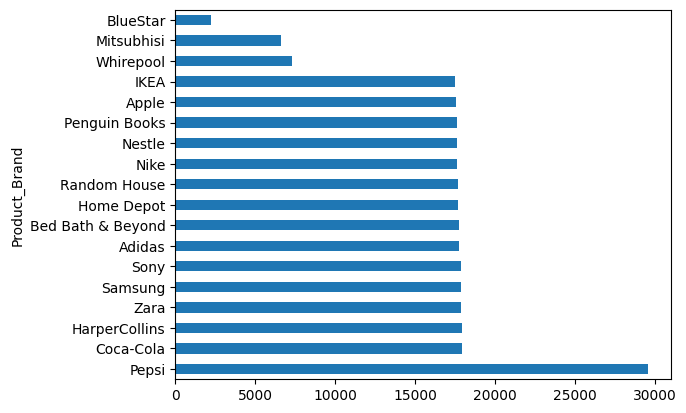

In [21]:
df['Product_Brand'].value_counts().plot(kind='barh')

According to our dataset Pepsi has the highest purchase rate in the store by all customers in the store

In [47]:
brand_name = 'Coca-Cola'
count = 10
brand_specific = df[df['Product_Brand'] == brand_name]

most_common_product = brand_specific['products'].value_counts().head(count)

print(f'Top {count} Products purchased from {brand_name}')
print(most_common_product)

Top 10 Products purchased from Coca-Cola
products
Spring water       636
Apple juice        632
Alkaline water     631
Mineral water      629
Sparkling water    621
Bottled water      620
Mango juice        617
Tomato juice       613
Orange juice       611
Cranberry juice    605
Name: count, dtype: int64


In [12]:
fig = px.choropleth(df.groupby('Country')['Amount'].sum().reset_index(),
                    locations='Country',
                    locationmode='country names',
                    color='Amount',
                    color_continuous_scale='Blues',
                    title='Total Purchase by Country')
fig.show()